# APS1070
#### Project 1 --- Basic Principles and Models
**Deadline: Oct 6th, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

**Name**: 

Student ID: 

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



In [ ]:
%%shell
jupyter nbconvert --to html /content/APS1070_Project_1.ipynb

[NbConvertApp] Converting notebook /content/APS1070_Project_1.ipynb to html
[NbConvertApp] Writing 999372 bytes to /content/APS1070_Project_1.html


# Project 1 [10 Marks]
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a [boston dataset](https://openml.org/search?type=data&status=any&id=43465). Download it using the cell below:

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = fetch_openml(name='Boston-house-price-data', version=1, parser="auto")

df = pd.DataFrame(data = dataset.data)
df['target'] = dataset.target

target_median = df.target.median()
print('target median value: ', target_median)
print('target count has greater value than median: ', len(df.loc[df.target > 21.2]))

# add new column new_target to the datafram,
# which containing either 0 (if the target value is below the median) or 1 (if the target value is above the median).
new_target_value = []
for i in range(0,len(df)):
  if df.loc[i, 'target'] < target_median:
    new_target_value.append(0)
  else:
    new_target_value.append(1)
# add the new column
df['new_target'] = new_target_value

print(df)

target median value:  21.2
target count has greater value than median:  250
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  L

## Part 1: Getting started [2.5 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? 13
* Determine the median target value. 21.2
* How many participants have a target value greater than the median target value? 250

Now add an additional column containing either 0 (if the target value is below the median) or 1 (if the target value is above the median). This will be the new target value to classify the data as the owner-occupied homes value in \$1000's below median or the owner-occupied homes value in \$1000's above median. **[0.5]**

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.)

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [2]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split

#feature matrix that only contains features
df_drop_target = pd.DataFrame(data = dataset.data)
df_drop_target = df_drop_target.drop('target', axis = 1)

# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(df_drop_target, df.new_target, random_state=0, test_size=0.3)

X_train_plot = pd.DataFrame(data = X_train, columns = dataset.feature_names)
X_train_plot['target'] = y_train

# X_train['target'] = y_train
# X_test['target'] = y_test

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is the *proportion of owner-occupied units built prior to 1940* i.e. ``AGE``, the y-axis is the *weighted distances to five Boston employment centres* i.e. ``DIS``, and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**


# Answer:
1. the both axis value has changed, both X-axis data and Y-axis data has changed to same means and ranges.
2. they look similar because it didn't change the ratio of each data
3. the advantage of standardization is it can transforms data to standard format, which can reduce costs and improve accuracy of machine learning.

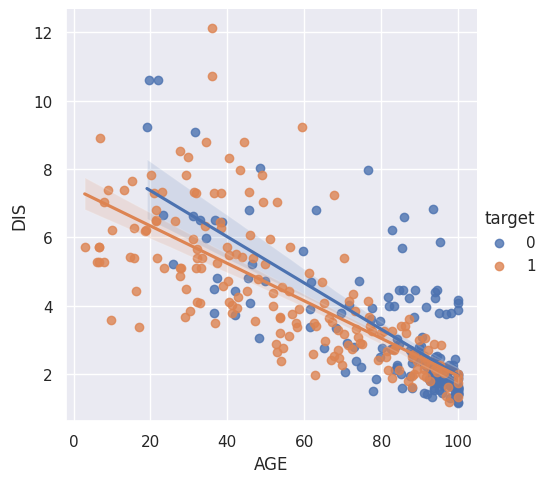

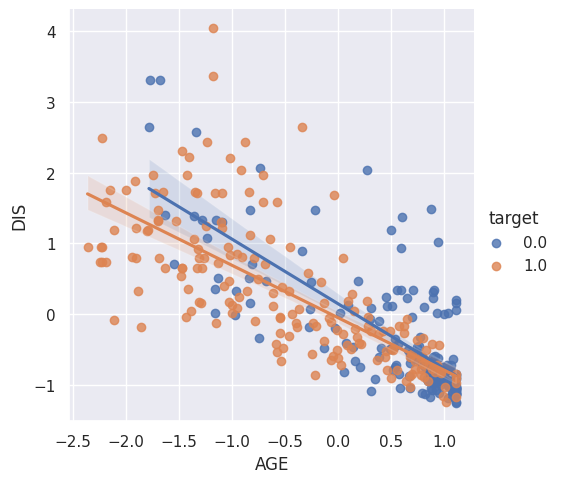

In [3]:
### YOUR CODE HERE ###
import seaborn as sns
sns.set_theme(color_codes=True)

#plot one graph
plot_1 = sns.lmplot(data = X_train_plot, x = "AGE", y = "DIS", hue = "target")

#standalization
import scipy
from scipy import stats

X_train_standardize = pd.DataFrame(data = dataset.data)
X_train_standardize['AGE'] = stats.zscore(X_train['AGE'])
X_train_standardize['DIS'] = stats.zscore(X_train['DIS'])
X_train_standardize['target'] = y_train

#plot the graph after standardize
plot_after_standardize = sns.lmplot(data = X_train_standardize, x = "AGE", y = "DIS", hue = "target")

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a house has the owner-occupied homes value that is less than the median or greater than the median.

Follow these steps:

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**



# **Answer:**
1. the best k is 3, cause it has high validation accuracy when the train accuracy is still high. And the highest cross-validation accuracy is 80.233%
2. underfitted[40, 100], because after 40, the training and test validation droped significantly.
overfitted[1, 3], before 3 the validation curve is not as high as training curve



when k is:1, train accuracy is 1.0, test accuracy is 0.8023340040241449
when k is:2, train accuracy is 0.9032573533071219, test accuracy is 0.7712273641851106
when k is:3, train accuracy is 0.9138530831632907, test accuracy is 0.8023340040241449
when k is:4, train accuracy is 0.8863036878514906, test accuracy is 0.7993963782696177
when k is:5, train accuracy is 0.8806474891753346, test accuracy is 0.7825352112676056
when k is:6, train accuracy is 0.8636963121485094, test accuracy is 0.7966599597585512
when k is:7, train accuracy is 0.8615811476633655, test accuracy is 0.7882494969818914
when k is:8, train accuracy is 0.8453341959886528, test accuracy is 0.7711871227364184
when k is:9, train accuracy is 0.8319290300104514, test accuracy is 0.773963782696177
when k is:10, train accuracy is 0.8206290748021701, test accuracy is 0.7711468812877265
when k is:11, train accuracy is 0.8185139103170258, test accuracy is 0.7824547283702212
when k is:12, train accuracy is 0.8142786044891256, test 

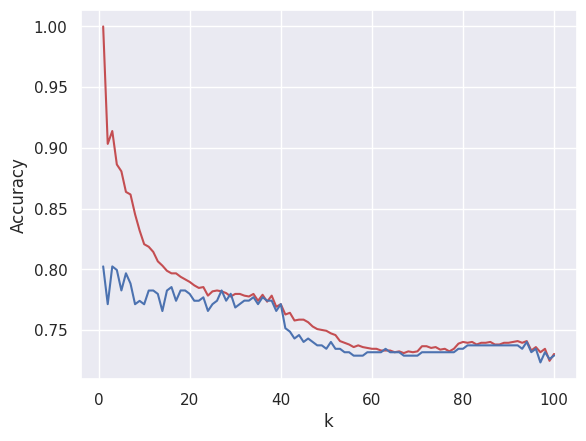

In [4]:
### YOUR CODE HERE ###
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
score_val = []
score_train = []

for k in range(1, 101):
  knn = neighbors.KNeighborsClassifier(n_neighbors = k)
  #scores = cross_val_score(knn, X_train, y_train, cv = 5)
  scores = cross_validate(knn, X_train, y_train, cv = 5, return_train_score=True)


  score_val.append(scores['train_score'].mean())
  score_train.append(scores['test_score'].mean())
  print("when k is:{}, train accuracy is {}, test accuracy is {}".format(k, scores['train_score'].mean(), scores['test_score'].mean()))

plt.plot(range(1, 101), score_val, 'r')
plt.plot(range(1, 101), score_train, 'b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


  # knn.fit(X_train, y_train)
  # y_pred = knn.predict(X_test)
  # print("when k is:{}, accuracy is {}".format(k, knn.score(X_test, y_test)))


## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy.
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!.

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2.
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7).

7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  









You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order.
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


# **Answer:**
1. the graph is behind the code
2. the graph is behind the code
3. the number of essential features is 7, cause the accuracy increase rapidly when remove the 8th feature

calculating..............


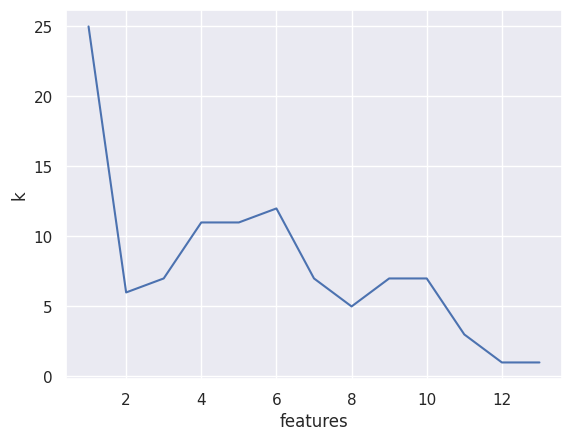

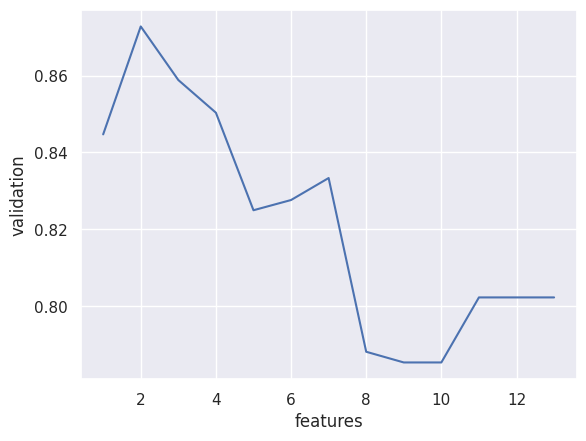

In [5]:
from sklearn import tree
from matplotlib import pyplot

#these two datas are for drawing
def Feature_selector (X_train , y_train , tr=0.95):
  plot_best_k = []
  plot_best_validation = []
  removed_features = []

  X_train_iteration = pd.DataFrame(data = X_train)
  #find the best k in the full feature situation
  full_k, full_cross_validate = Find_best_k_and_validate(X_train, y_train)
  print('calculating.', end = '')

  #calculate feature importance of all the values
  dt = tree.DecisionTreeClassifier()
  dt.fit(X_train_iteration, y_train)
  feature_names = X_train_iteration.columns.values.tolist()
  features_value = dt.feature_importances_

  while True:
    # dt = tree.DecisionTreeClassifier()
    # dt.fit(X_train_iteration, y_train)
    # feature_names = X_train_iteration.columns.values.tolist()
    # features_value = dt.feature_importances_

    #calculate current validation value
    current_best_k, current_score = Find_best_k_and_validate(X_train_iteration, y_train)
    #print('current we have {} features, and we got {} accuracy currently\n'.format(len(features_value), current_score))
    plot_best_k.insert(0, current_best_k)
    plot_best_validation.insert(0, current_score)
    print('.', end = '')

    if current_score < full_cross_validate * tr:
      break

    if len(features_value) == 1:
      break
    # print(features_value)
    # print(feature_names)

    #return the smallest importance feature and detete it
    smallest_column_name, smallest_value, smallest_index = Find_least_important_value(feature_names, features_value)
    removed_features.insert(0, feature_names[smallest_index])
    # print(feature_names[smallest_index], features_value[smallest_index])

    feature_names = np.delete(feature_names, smallest_index)
    features_value = np.delete(features_value, smallest_index)
    X_train_iteration = X_train_iteration.drop(columns = [smallest_column_name], axis=1)

    # print(feature_names)
    # print(features_value)
    # print(smallest_column_name)
    # print(X_train_iteration)
  print('')
  return plot_best_k, plot_best_validation, removed_features



#find the least important value of the features, return the index and the value
def Find_least_important_value(feature_names, feature_values):
  if len(feature_names) == 0:
    return None, None
  smallest_index = 0
  smallest_value = feature_values[0]
  for i in range(0, len(feature_names)):
    if smallest_value >= feature_values[i]:
      smallest_value = feature_values[i]
      smallest_index = i

  return feature_names[smallest_index], smallest_value, smallest_index


#find best validation score
def Find_best_k_and_validate(X_train, y_train):
  best_k = 1
  score = 0

  for k in range(1, 101):
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 5)
    current_score = scores.mean()
    if current_score > score:
      score = current_score
      best_k = k
  return best_k, score


plot_best_k, plot_best_validation, features_now = Feature_selector(X_train, y_train)
plt.plot(range(1,14), plot_best_k)
plt.xlabel('features')
plt.ylabel('k')
plt.show()

plt.plot(range(1,14), plot_best_validation)
plt.xlabel('features')
plt.ylabel('validation')
plt.show()


## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one.

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html))

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%.
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization affected your model and its performance?


# **Answer:**
after ploting the graph, we can discover that after standardizing data, the accuracy of the same k can be significantly improved.

calculating..............
calculating..............
finished---------------------
best k is  7  and best validation is 0.8758551307847082  with  12  features


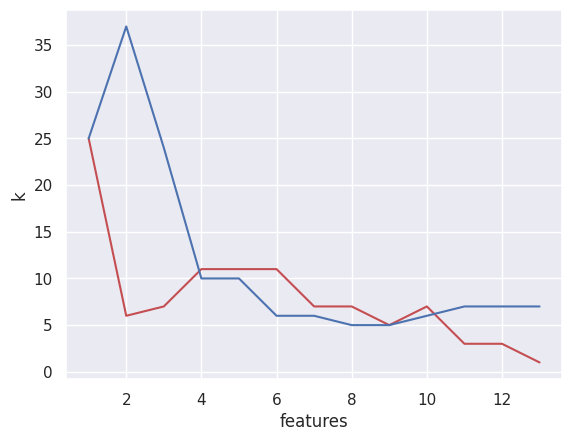

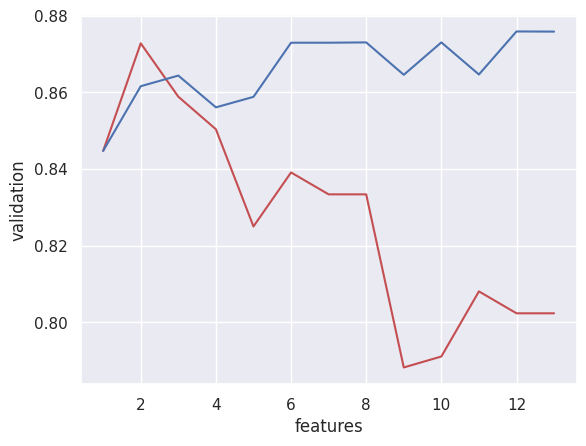

In [6]:
### YOUR CODE HERE ###
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_std = pd.DataFrame(data=(scaler.transform(X_train)), columns=dataset.feature_names)

plot_best_k_std, plot_best_validation_std, features_std = Feature_selector(X_train_std, y_train)
plot_best_k, plot_best_validation, features_stan = Feature_selector(X_train, y_train)
print('finished---------------------')

#get the best model when using KNN
max_validation_index = plot_best_validation_std.index(max(plot_best_validation_std))
print('best k is ', plot_best_k_std[max_validation_index], ' and best validation is', plot_best_validation_std[max_validation_index], ' with ', max_validation_index + 1, ' features')


#red  --------  data without standardization
#blue  -------  data with standardization
plt.plot(range(1,14), plot_best_k,'r')
plt.plot(range(1,14), plot_best_k_std,'b')
plt.xlabel('features')
plt.ylabel('k')
plt.show()

plt.plot(range(1,14), plot_best_validation, 'r')
plt.plot(range(1,14), plot_best_validation_std, 'b')
plt.xlabel('features')
plt.ylabel('validation')
plt.show()

## Part 5: Decision Tree Classifier [1 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features.


# **Answer:**
we can see the validation of knn when using all features in part 4, which is 87.6%, so the performance of the KNN model is better than decision tree when using all the features and standardized data

In [7]:
from sklearn.tree import DecisionTreeClassifier
### YOUR CODE HERE ###

#store the model that has highest CV score
final_model = DecisionTreeClassifier()
max_tree_score = 0
min_samples_split_best = 2


for i in range(1, 45):
  for j in range(2, 45):
    dt = DecisionTreeClassifier(max_depth = i, min_samples_split=j, random_state=3)
    dt.fit(X_train_std, y_train)
    scores = cross_val_score(dt, X_train_std, y_train, cv = 5)
    current_tree_score = scores.mean()
    #print(current_tree_score)
    if current_tree_score > max_tree_score:
      final_model = dt
      max_tree_score = current_tree_score
      min_samples_split_best = j
    # scoress = cross_val_score(final_model, X_train, y_train, cv = 5)
    # print('......',scoress.mean())
print('max: ', max_tree_score, ' depth: ', final_model.max_depth, ' min_samples_split: ', min_samples_split_best)


max:  0.8559356136820926  depth:  7  min_samples_split:  10


## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

# **Answer:**
we can see that when we use the knn model, the accuracy of the train dataset will be higher than the situation with the test dataset, but it still in the acceptable range

In [8]:
### YOUR CODE HERE ###
X_test_std = pd.DataFrame(data=(scaler.transform(X_test)), columns=dataset.feature_names)
X_test_std_last = X_test_std.loc[:, features_std]

# print(X_test_std_last)

knn = neighbors.KNeighborsClassifier(n_neighbors = plot_best_k_std[max_validation_index])
scores_knn = cross_val_score(knn, X_test_std_last, y_test, cv = 5)
scores_tree = cross_val_score(final_model, X_test_std_last, y_test, cv = 5)
# print('final CV accuracy of decision tree is: ',scores_tree.mean())

#get which is the best performance model
final_best_accuracy = 0
if scores_knn.mean() > scores_tree.mean():
  print('best is knn')
  final_best_accuracy = scores_knn.mean()
else:
  print('best is tree')
  final_best_accuracy = scores_tree.mean()
print('Best: final CV accuracy is: ', final_best_accuracy)

best is knn
Best: final CV accuracy is:  0.7836559139784948


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/